In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
brazil_dataset = pd.read_csv('finaldf.csv')
order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv')

#널값을 빈값으로 변경
order_reviews_dataset['review_comment_title'] = order_reviews_dataset['review_comment_title'].fillna('')
order_reviews_dataset['review_comment_message'] = order_reviews_dataset['review_comment_message'].fillna('')

In [40]:
brazil_dataset = brazil_dataset.merge(order_reviews_dataset, on = 'order_id', how='left')
df = brazil_dataset.copy()
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'product_category_name_english',
       'customer_zip_code_prefix', 'seller_zip_code_prefix',
       'seller_geolocation_lat', 'seller_geolocation_lng',
       'customer_geolocation_lat', 'customer_geolocation_lng', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

In [41]:
category_mean = df.groupby(['product_category_name_english']).mean()

In [42]:
print(category_mean)

                               order_item_id       price  freight_value  \
product_category_name_english                                             
agro_industry_and_commerce          1.252427  342.553883      27.365049   
air_conditioning                    1.219512  185.100209      22.641533   
art                                 1.010471  121.334974      19.482251   
arts_and_craftmanship               1.086957   78.443913      15.497826   
audio                               1.047354  139.027047      15.765209   
...                                      ...         ...            ...   
stationery                          1.103320   91.032440      18.583075   
tablets_printing_image              1.049383   90.498889      15.009012   
telephony                           1.124422   70.130393      15.665067   
toys                                1.067887  116.976240      18.840679   
watches_gifts                       1.093096  199.472781      16.759625   

                        

Text(0.5, 1.0, 'review_score_mean')

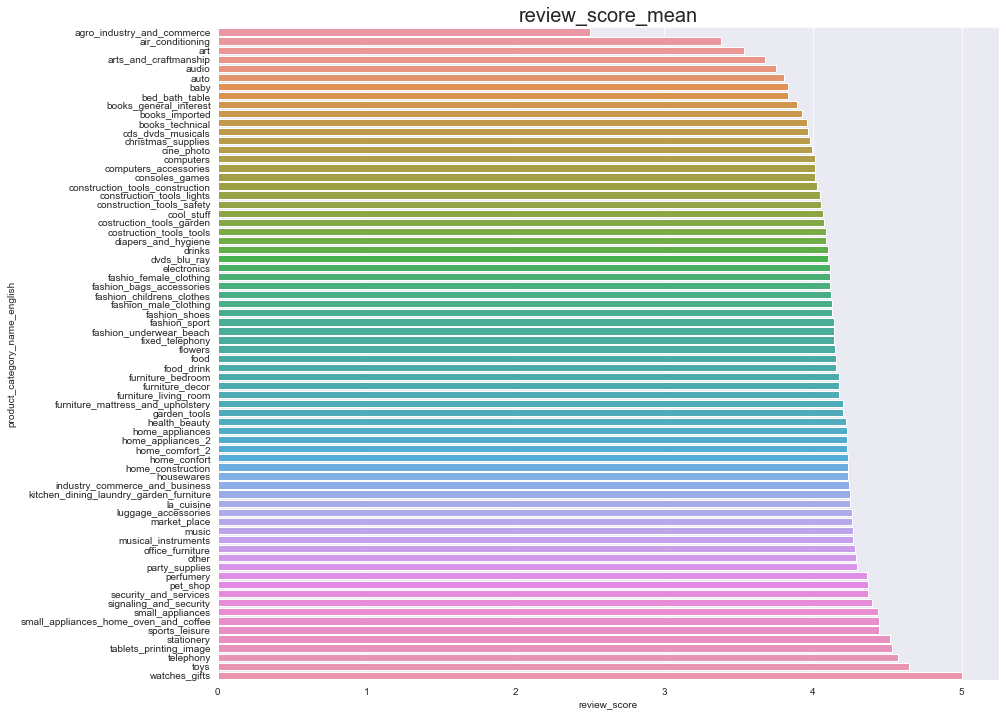

In [44]:
fig=plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
sns.barplot(y=category_mean.index, x=category_mean['review_score'].sort_values())
plt.title('review_score_mean',fontsize=20)